Exploratory Data Analysis Starter
1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Hypothesis investigation

1. Import packages

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

2. Loading data with Pandas

In [3]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

In [4]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [7]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


3. Descriptive statistics of data

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

Descriptive statistics of data
Data types
It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the info() method.

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


Statistics

In [10]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [11]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


3. Data visualization

In [12]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Churn

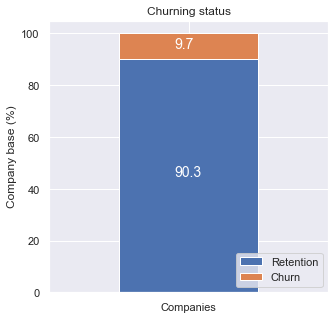

In [13]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

Sales channel

In [16]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

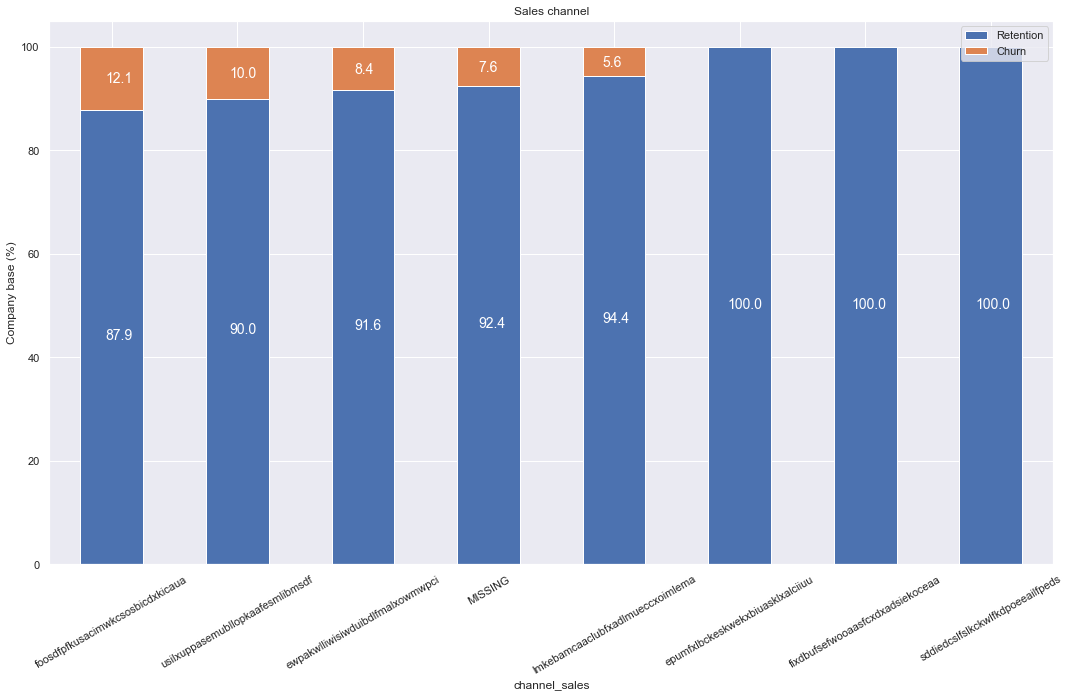

In [17]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_=30)

Interestingly, the churning customers are distributed over 5 different values for channel_sales. As well as this, the value of MISSING has a churn rate of 7.6%. MISSING indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

Consumption

In [18]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [20]:
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

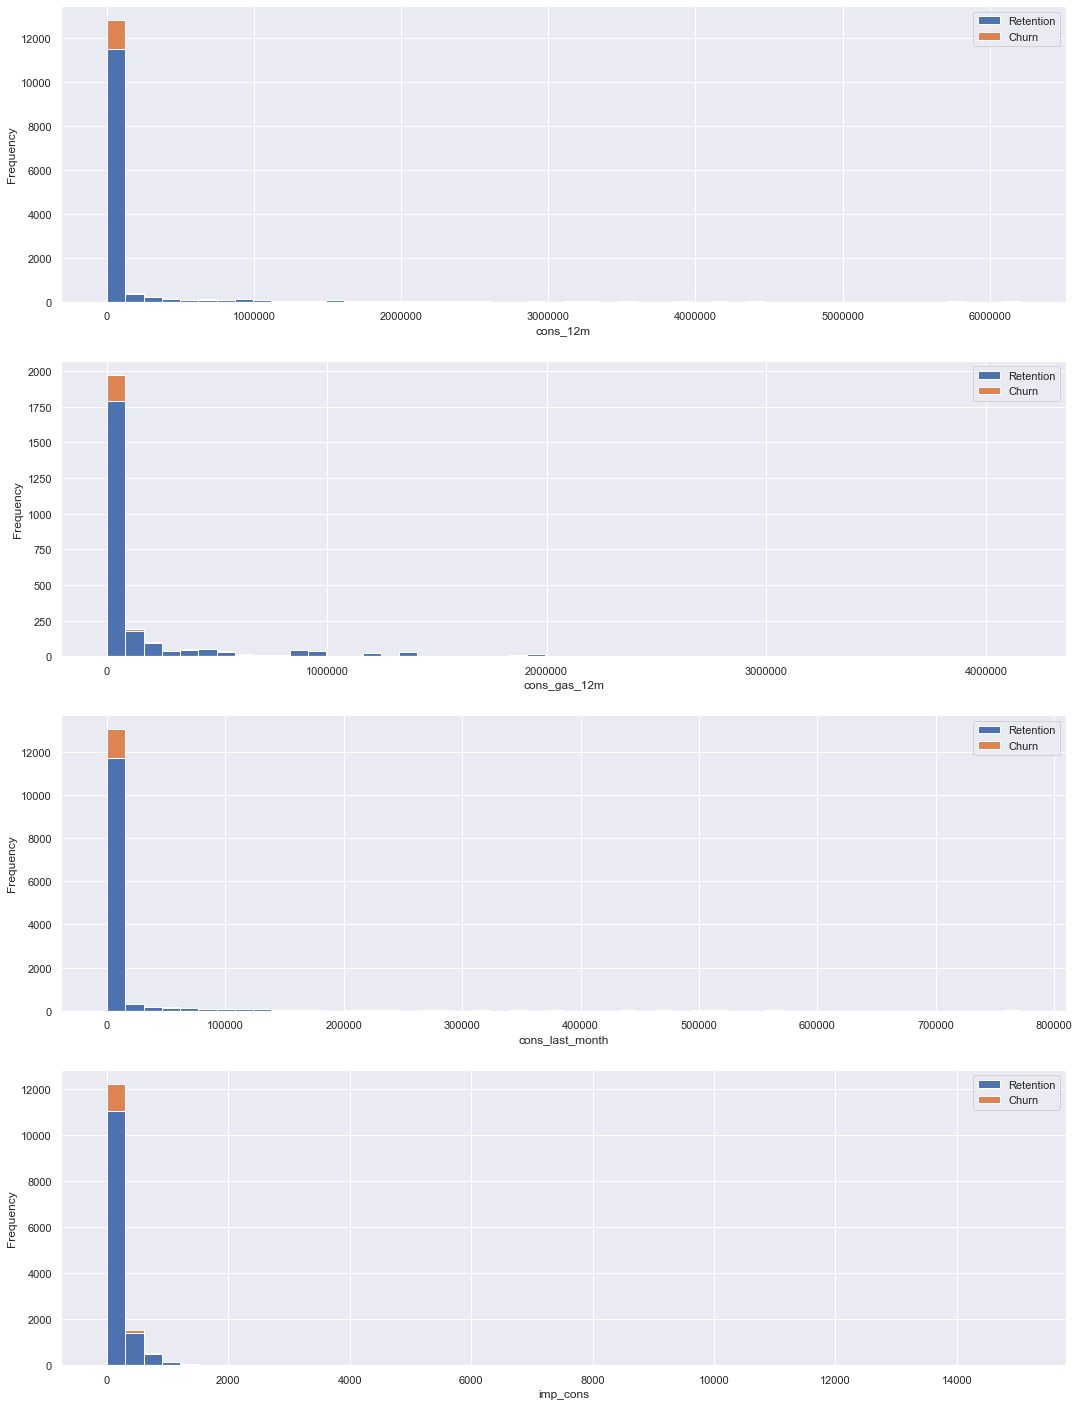

In [19]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:

Minimum
First quartile (Q1)
Median
Third quartile (Q3)
Maximum
It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

C:\Users\My Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Dell\anaconda

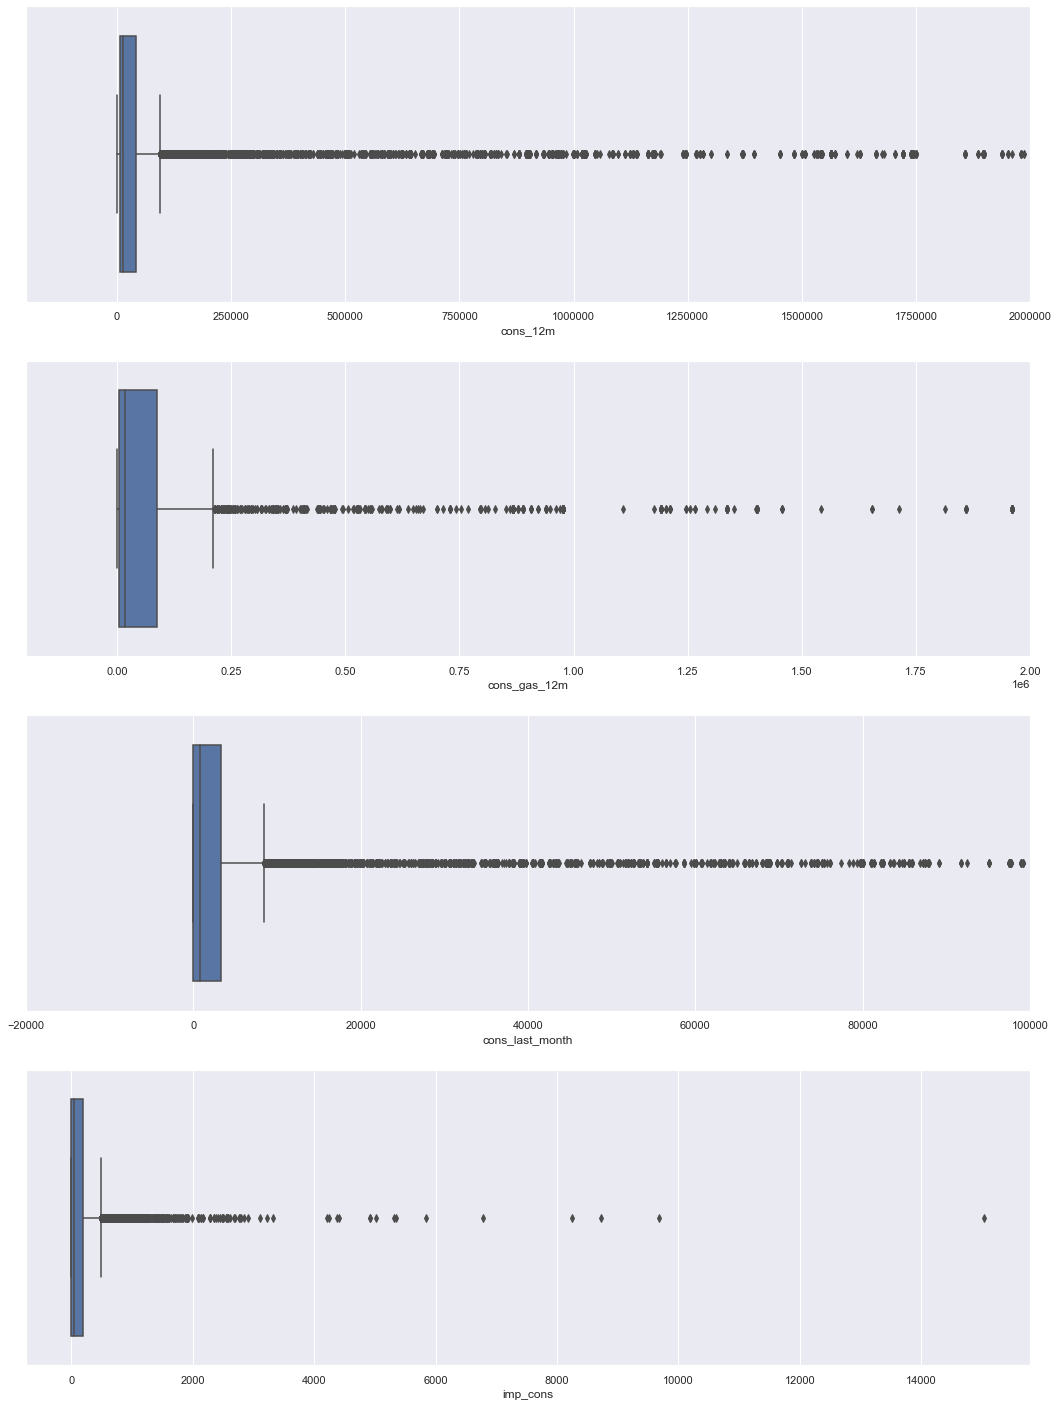

In [21]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

Forecast

In [30]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_p1","forecast_price_energy_p2",
    "forecast_price_pow_p1","churn"
    ]
]

KeyError: "['forecast_price_energy_p1', 'forecast_price_energy_p2', 'forecast_price_pow_p1'] not in index"

KeyError: 'forecast_price_energy_p1'

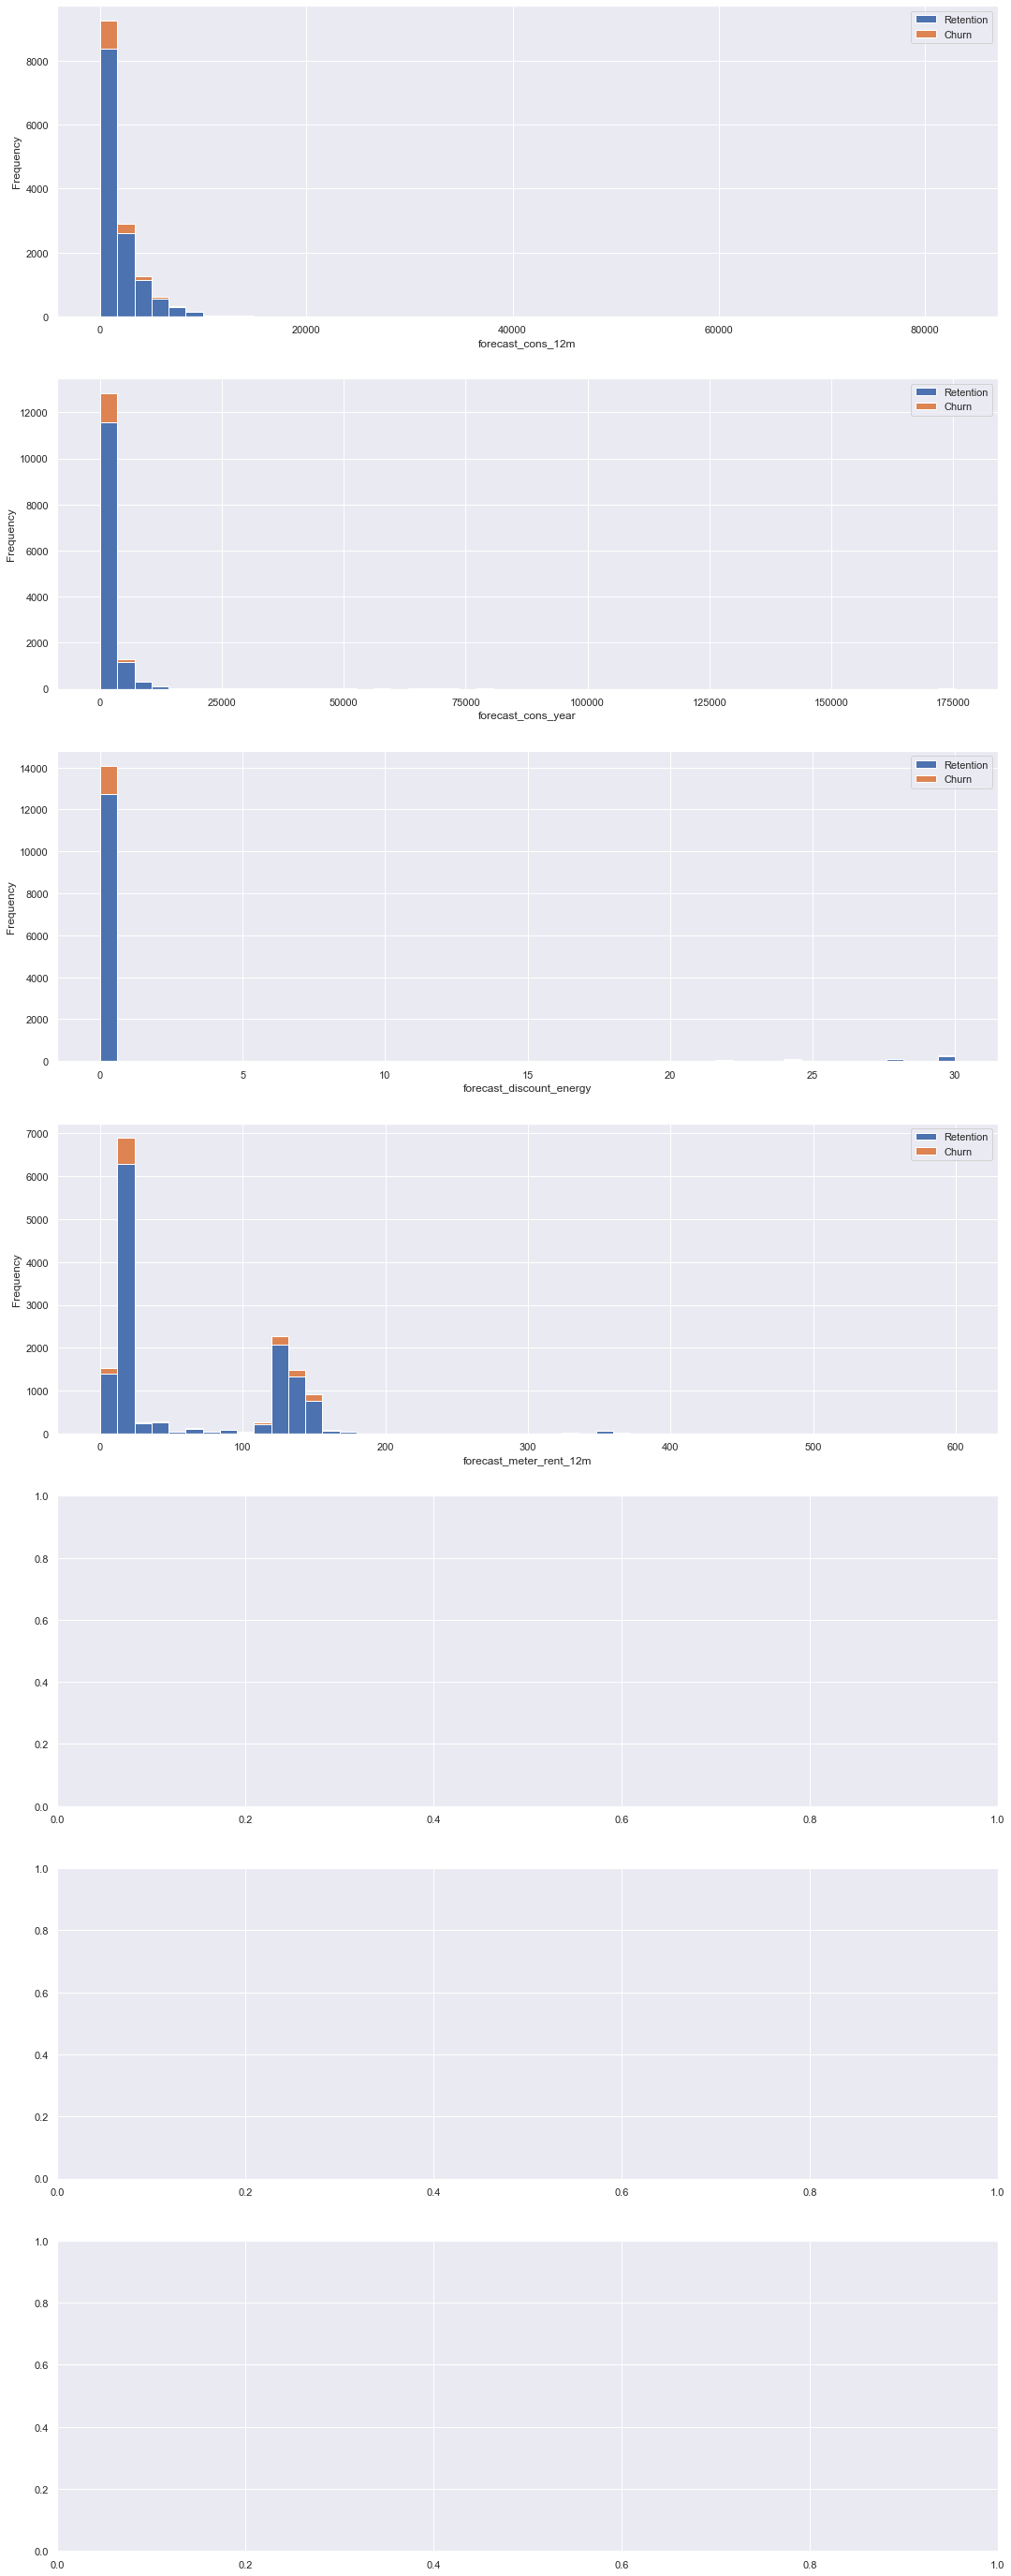

In [31]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_p1", axs[4])
plot_distribution(client_df, "forecast_price_energy_p2", axs[5])
plot_distribution(client_df, "forecast_price_pow_p1", axs[6])

Contract type

In [32]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

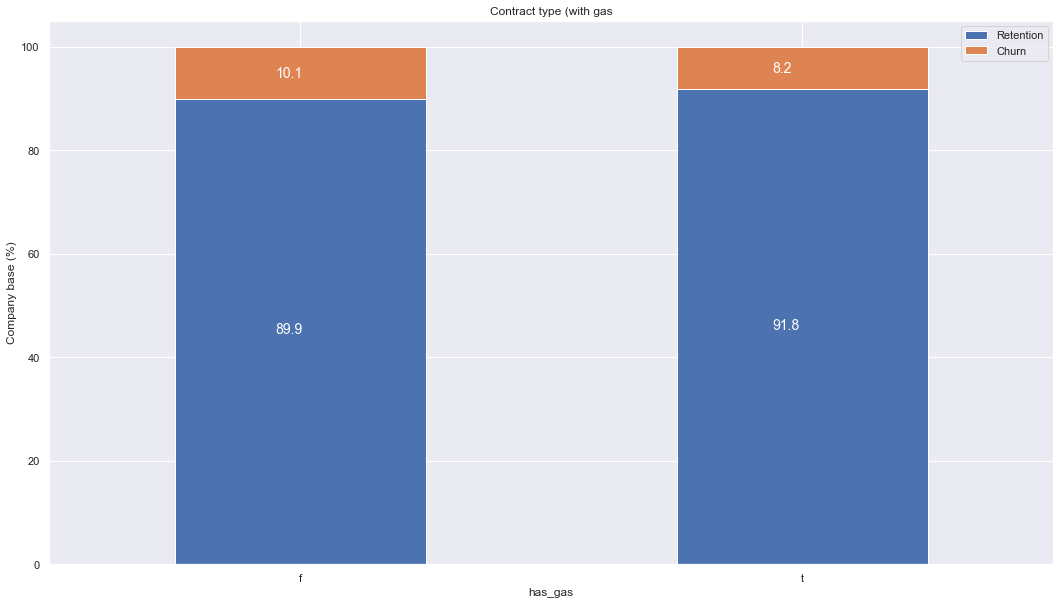

In [33]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

Margins

In [34]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

C:\Users\My Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\My Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


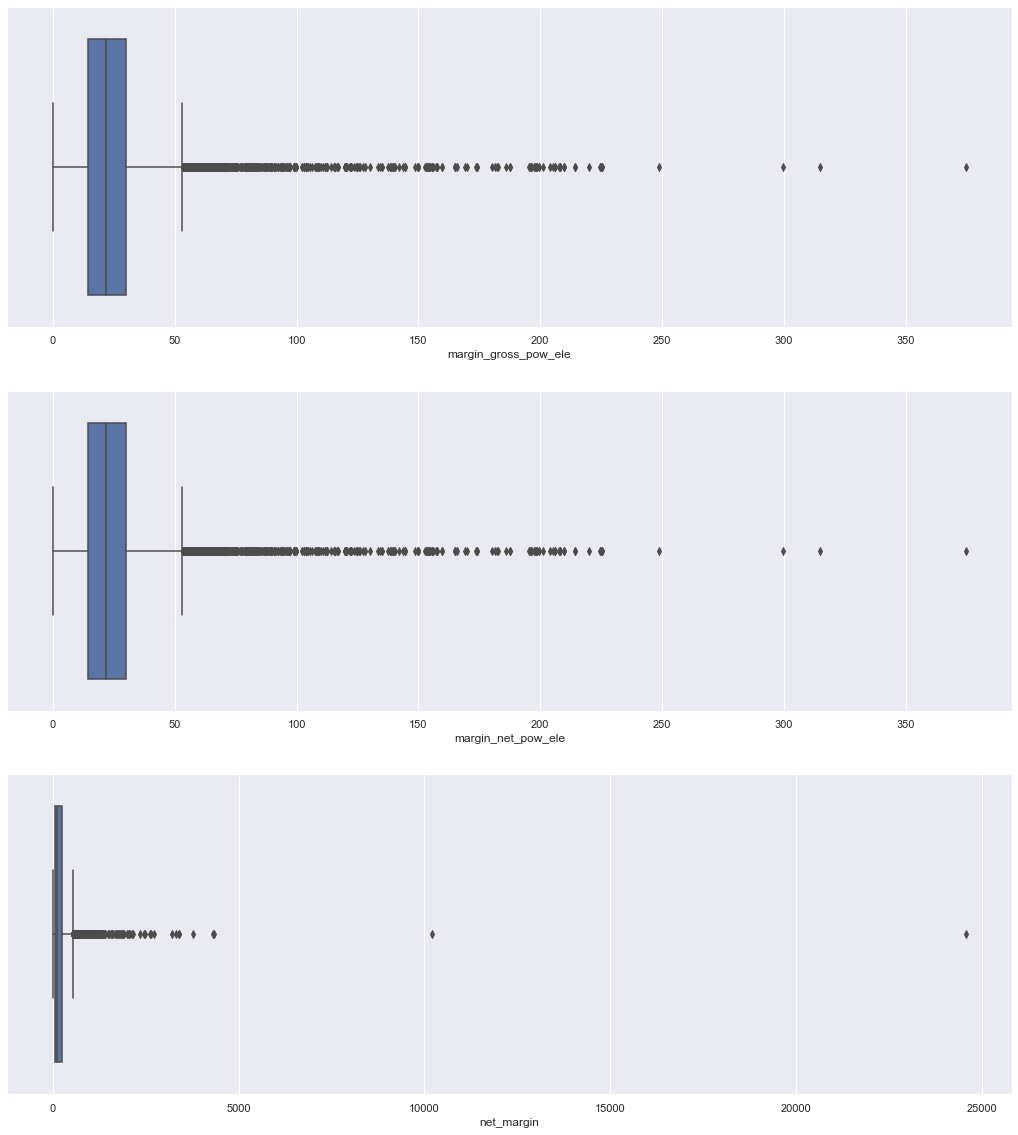

In [35]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

Subscribed power

In [36]:
power = client_df[['id', 'pow_max', 'churn']]

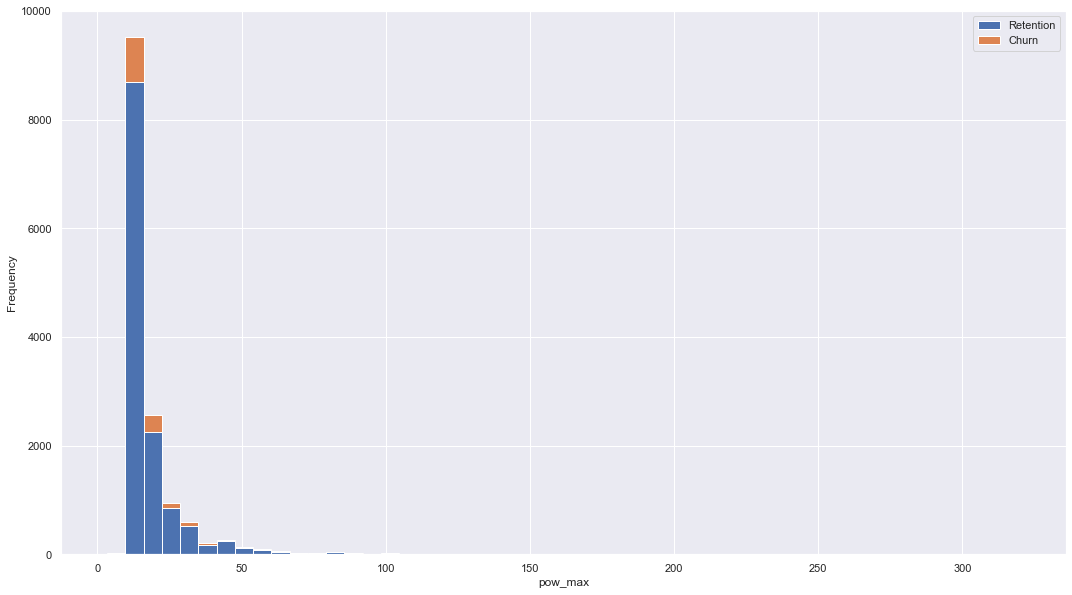

In [37]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

Other columns

In [38]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

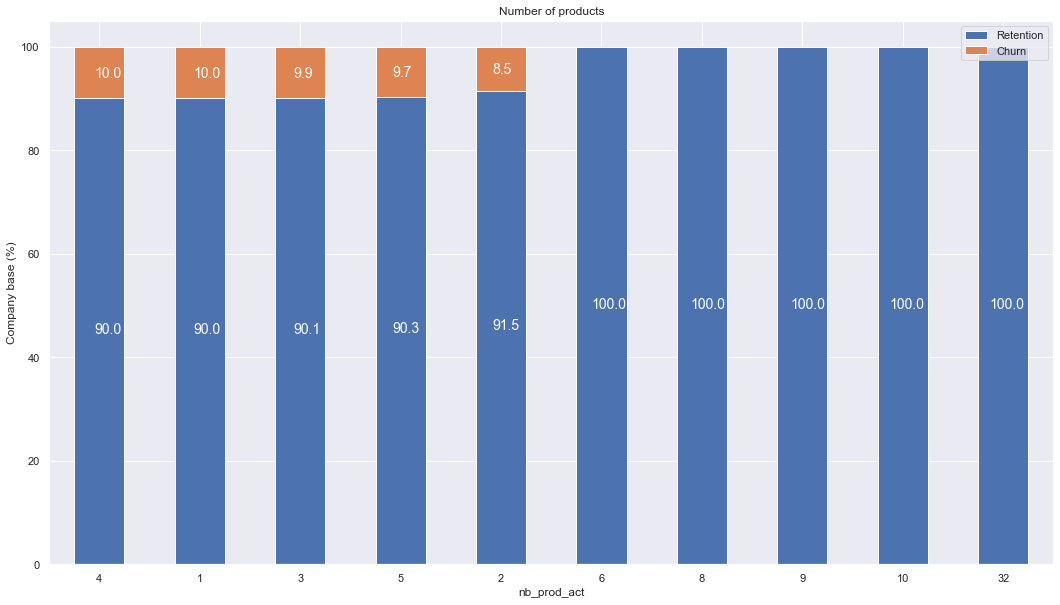

In [39]:
plot_stacked_bars(products_percentage, "Number of products")

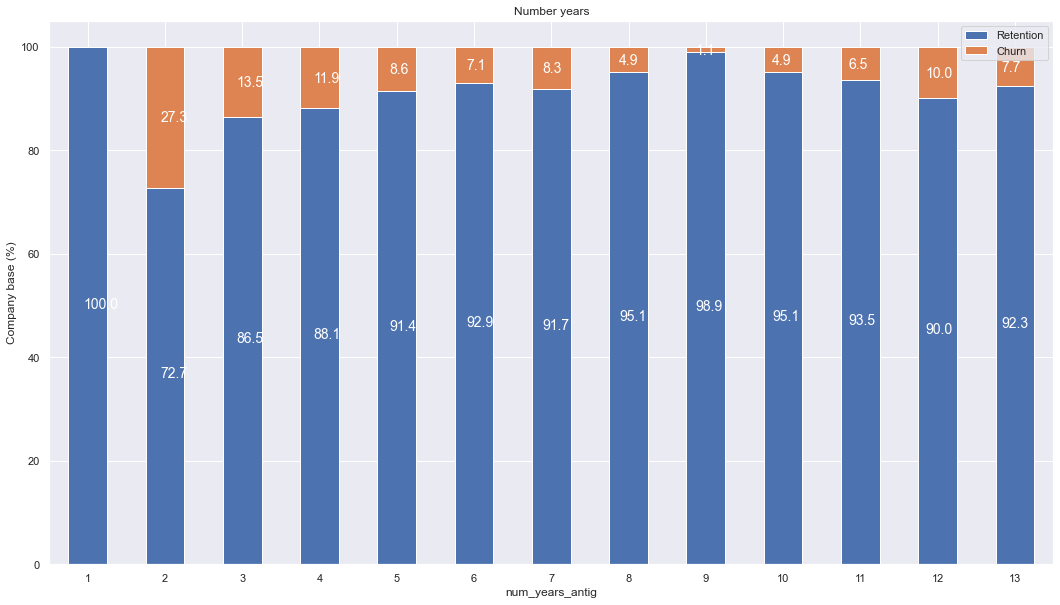

In [40]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

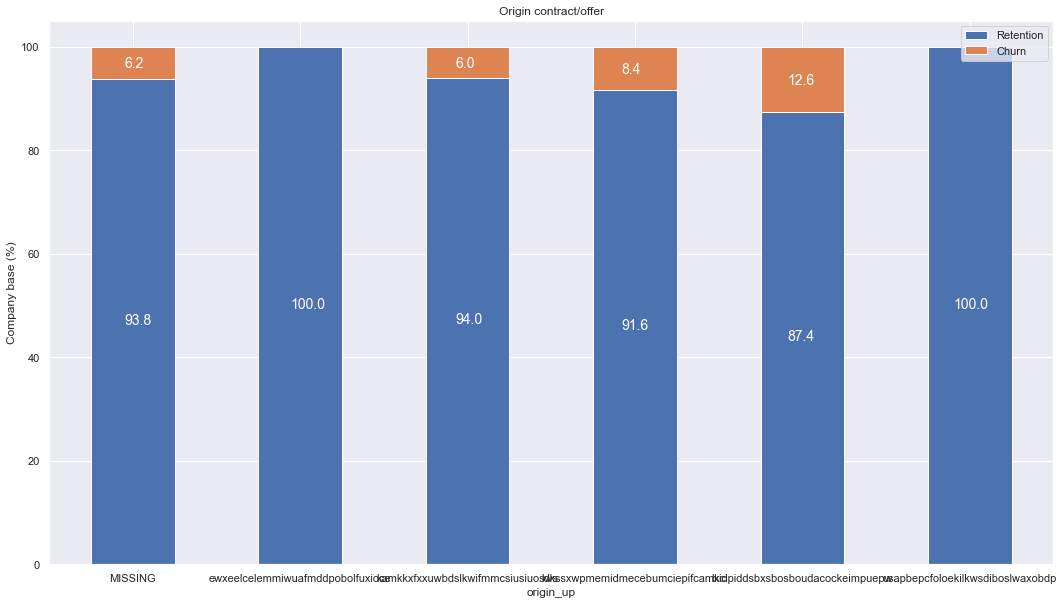

In [41]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

5. Hypothesis investigation

In [33]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

In [35]:
# Create yearly sensitivity features
var_year = price_df.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()

In [36]:
# Create last 6 months sensitivity features
var_6m = price_df[
price_df['price_date'] > '2015-06-01'].groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()

In [38]:
# Rename columns
var_year = var_year.rename(
columns={
"price_p1_var": "var_year_price_p1_var",
"price_p2_var": "var_year_price_p2_var",
"price_p3_var": "var_year_price_p3_var",
"price_p1_fix": "var_year_price_p1_fix",
"price_p2_fix": "var_year_price_p2_fix",
"price_p3_fix": "var_year_price_p3_fix"
}
)
var_year["var_year_price_p1"] = var_year["var_year_price_p1_var"] + var_year["var_year_price_p1_fix"]
var_year["var_year_price_p2"] = var_year["var_year_price_p2_var"] + var_year["var_year_price_p2_fix"]
var_year["var_year_price_p3"] = var_year["var_year_price_p3_var"] + var_year["var_year_price_p3_fix"]
var_6m = var_6m.rename(
columns={
"price_p1_var": "var_6m_price_p1_var",
"price_p2_var": "var_6m_price_p2_var",
"price_p3_var": "var_6m_price_p3_var",
"price_p1_fix": "var_6m_price_p1_fix",
"price_p2_fix": "var_6m_price_p2_fix",
"price_p3_fix": "var_6m_price_p3_fix"
}
)
var_6m["var_6m_price_p1"] = var_6m["var_6m_price_p1_var"] + var_6m["var_6m_price_p1_fix"]
var_6m["var_6m_price_p2"] = var_6m["var_6m_price_p2_var"] + var_6m["var_6m_price_p2_fix"]
var_6m["var_6m_price_p3"] = var_6m["var_6m_price_p3_var"] + var_6m["var_6m_price_p3_fix"]

KeyError: 'var_year_price_p1_var'

In [39]:
# Merge into 1 dataframe
price_features = pd.merge(var_year, var_6m, on='id')

In [40]:
price_features.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0


In [41]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,price_off_peak_var_x,price_peak_var_x,price_mid_peak_var_x,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0


In [42]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

NameError: name 'plt' is not defined

In [43]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis, on='id')

In [44]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,price_off_peak_fix_x,price_peak_fix_x,price_mid_peak_fix_x,price_off_peak_var_y,price_peak_var_y,price_mid_peak_var_y,price_off_peak_fix_y,price_peak_fix_y,price_mid_peak_fix_y,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1.102785,49.550703,22.022535,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.006465,0.000000,0.000000,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.007662,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.006465,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.005429,0.001954,0.000869,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0


In [45]:
merged_data.to_csv('clean_data_after_eda.csv')